## Cassidy's Notebook For EDA

### Exploratory Data Analysis (EDA): 
- Including: distribution analysis of key features (visualize and discuss patterns, skewness, etc.)
- Correlation analysis between features and target variables
- Identification of potential relationships and insights
- Feature importance assessment
- Time-based patterns or trends (if applicable)

### Visualization requirements: 
- Include multiple detailed plots that effectively communicate your data insights
- Ensure all plots have properly labeled x and y axes
- Include descriptive titles
- Add legends where appropriate
- Consider using multiple plot types (histograms, scatter plots, box plots, heatmaps, etc.) to highlight different aspects of your data
- Accompany each visualization with interpretations of what the patterns reveal

### Load Data Processed Data

In [6]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [18]:
# Load training data for EDA
X_train = pd.read_csv('cleaned_x_train.csv')
Y_train = pd.read_csv('cleaned_y_train.csv')

print(X_train.columns)
print(Y_train.columns)

Index(['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH',
       'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEADSAF', 'ACEADNED',
       '_EDUCAG', '_AGE80', '_SEX', 'MENTHLTH', 'PHYSHLTH', '_SMOKER3',
       'race_2.0', 'race_3.0', 'race_4.0', 'race_5.0', 'race_6.0',
       'ACE_SCORE'],
      dtype='object')
Index(['risky_drinking'], dtype='object')


### EDA

### 1. Create count charts for each of the features

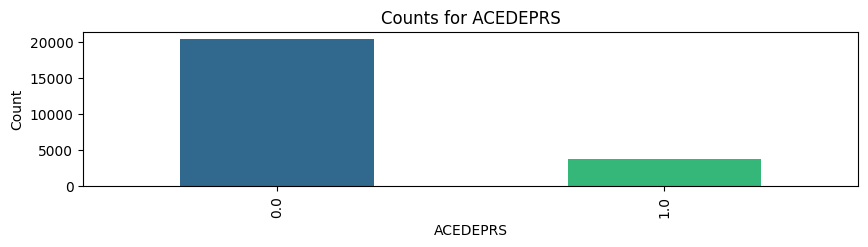

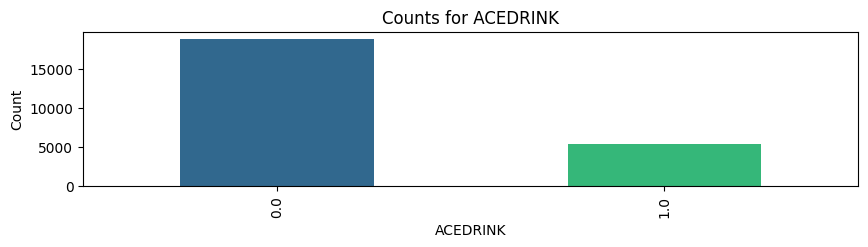

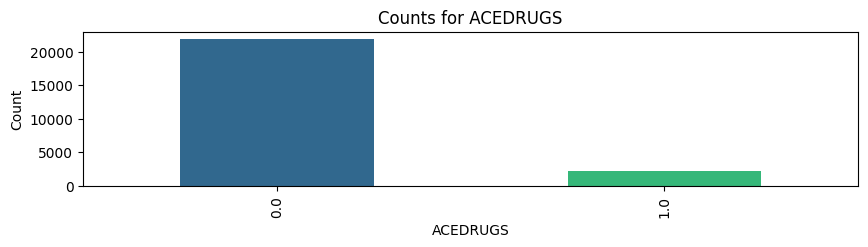

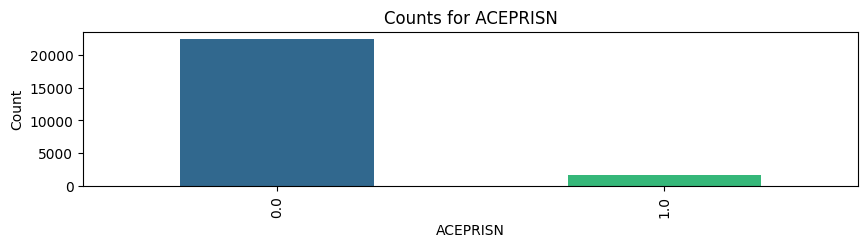

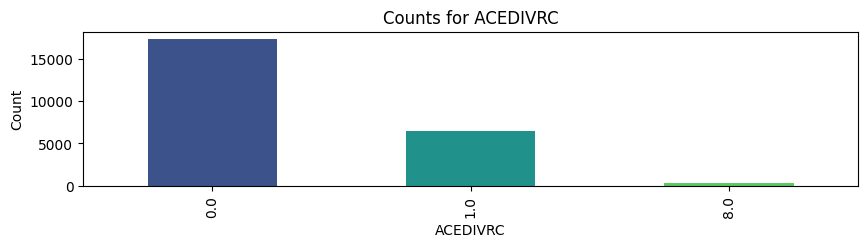

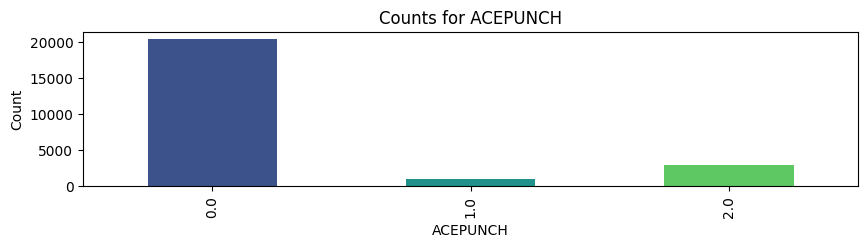

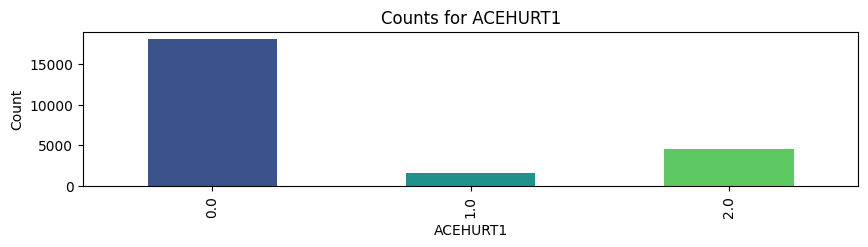

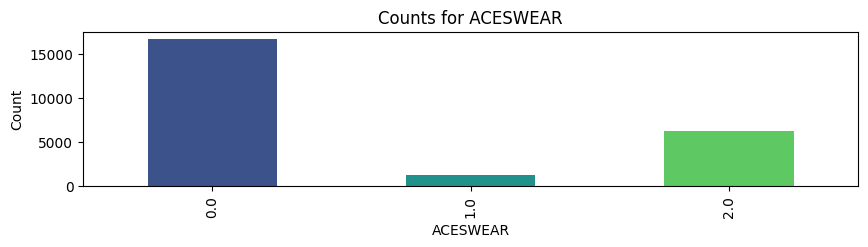

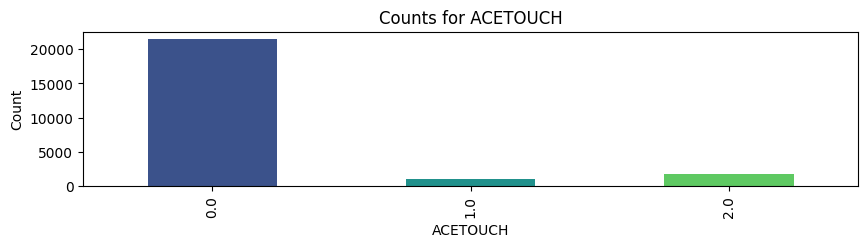

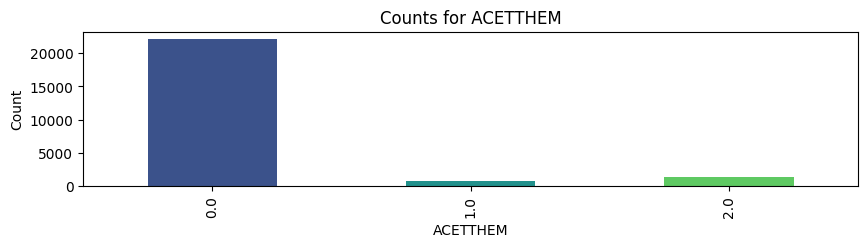

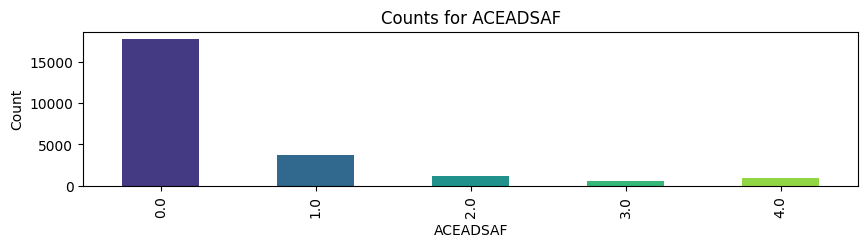

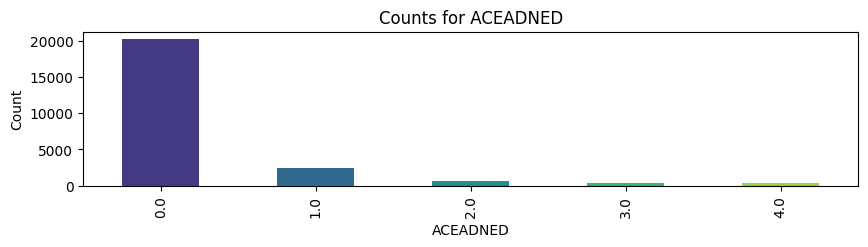

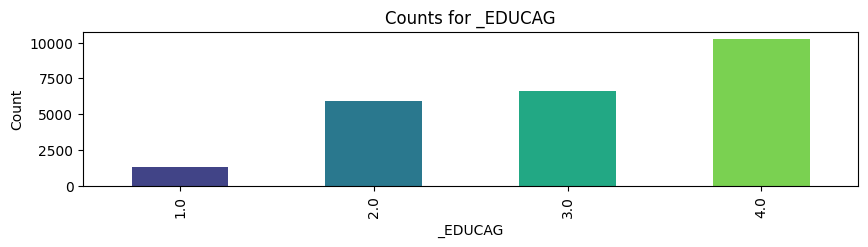

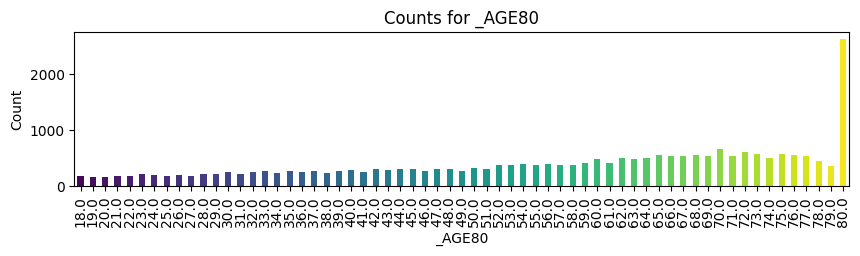

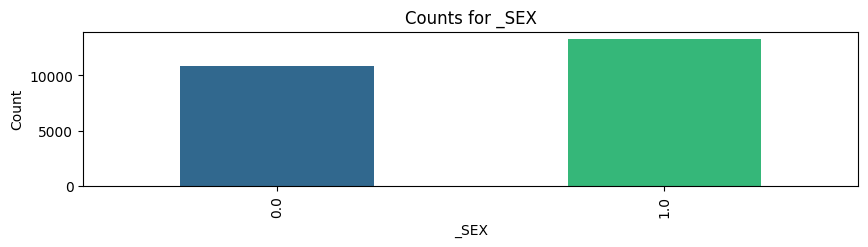

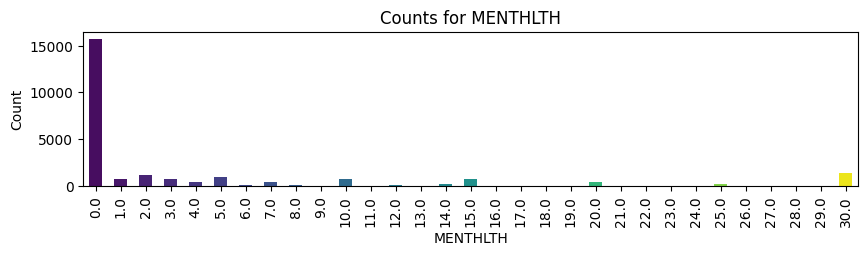

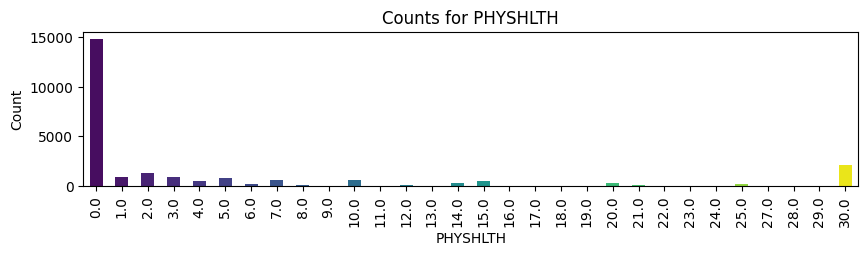

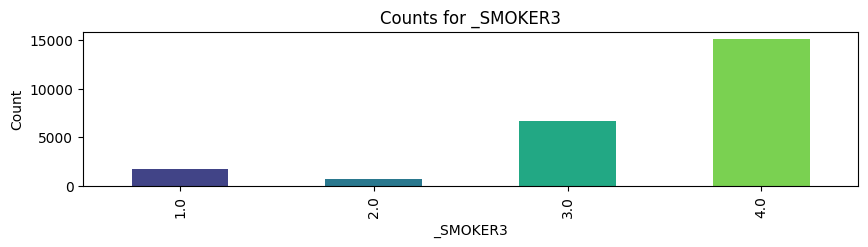

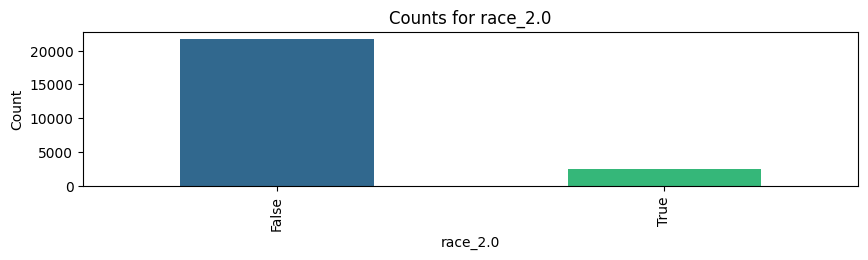

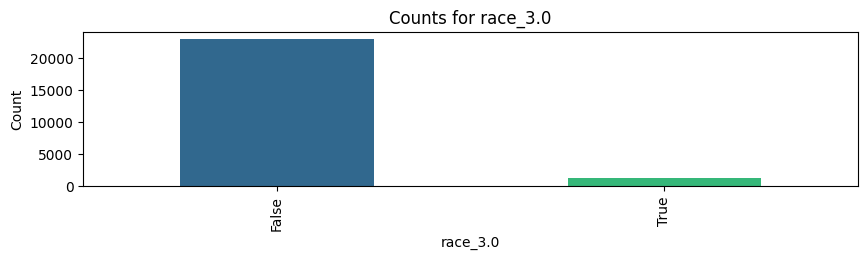

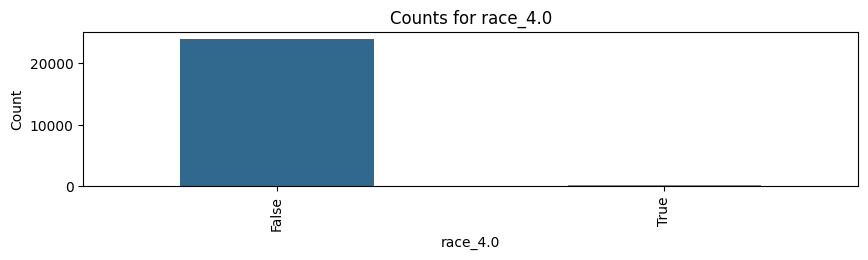

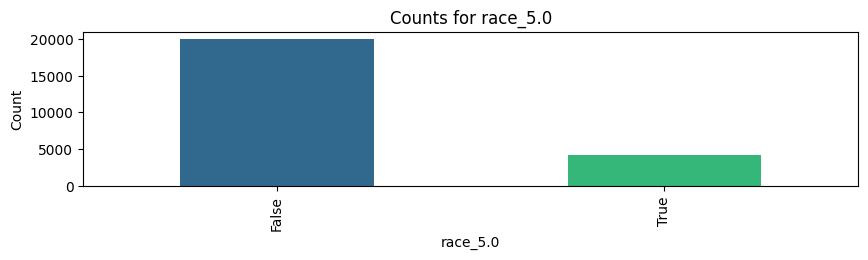

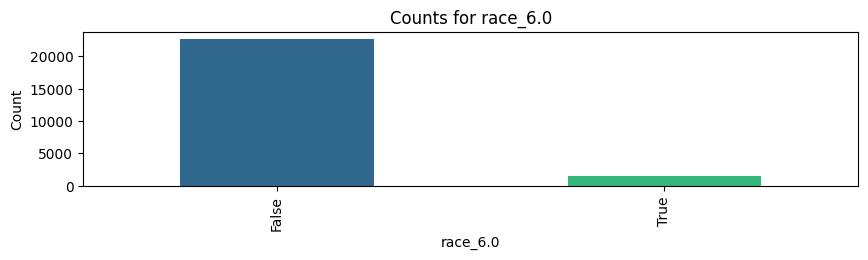

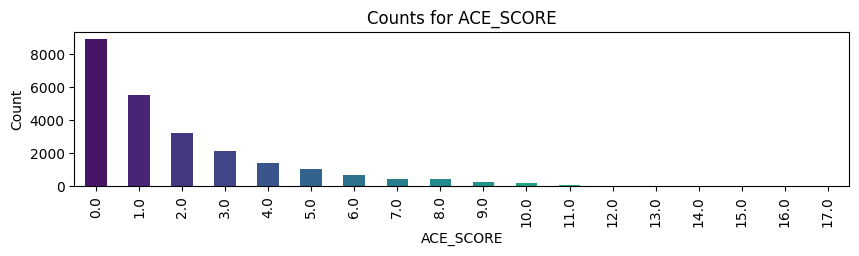

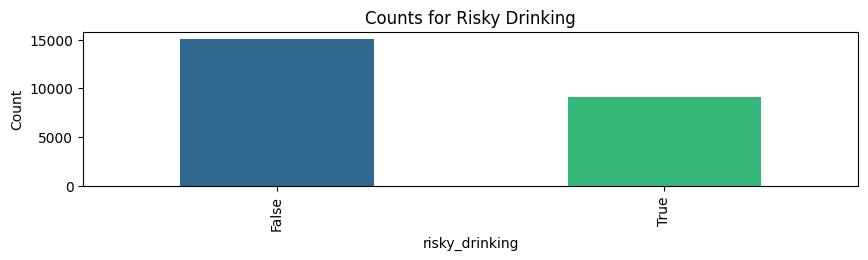

In [19]:
# Create count charts for each of the X train features
for col in X_train.columns:
    plt.figure(figsize=(10, 2))
    counts = X_train[col].value_counts().sort_index()
    colors = sns.color_palette("viridis", len(counts))
    counts.plot(kind='bar', color=colors)
    plt.title(f"Counts for {col}")
    plt.ylabel("Count")
    plt.show()

# Create a count chart for the risky_drinking attribute
plt.figure(figsize=(10, 2))
colors = sns.color_palette("viridis", len(Y_train['risky_drinking'].value_counts()))
Y_train['risky_drinking'].value_counts().plot(kind='bar', color=colors)
plt.title(f"Counts for Risky Drinking")
plt.ylabel("Count")
plt.show()

### 2. For each of the X_train features, view the proportion of "risky drinking" classifications for each value

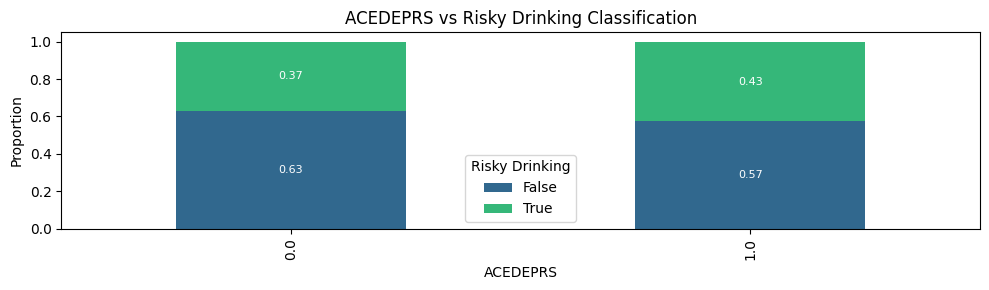

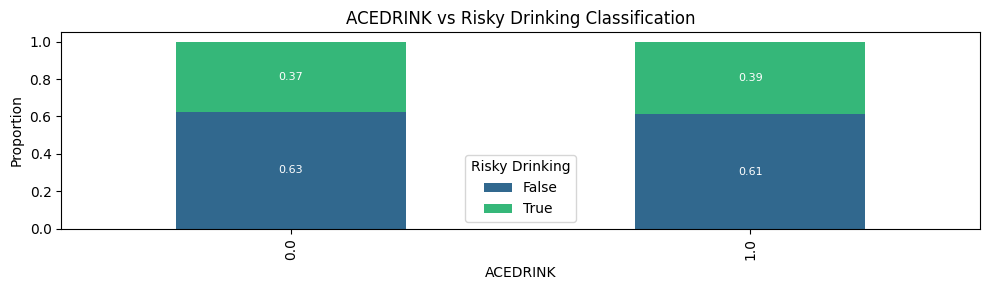

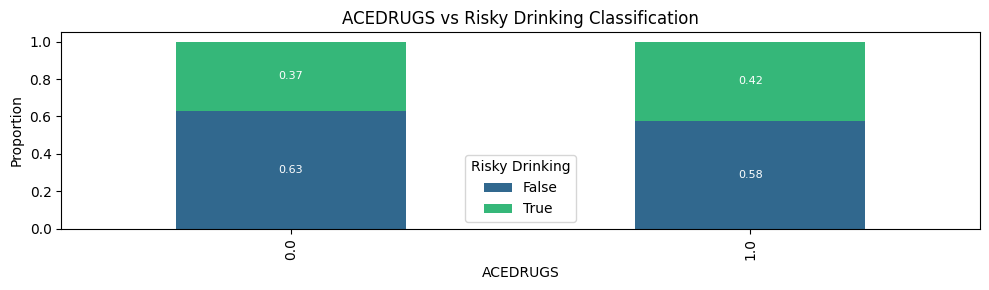

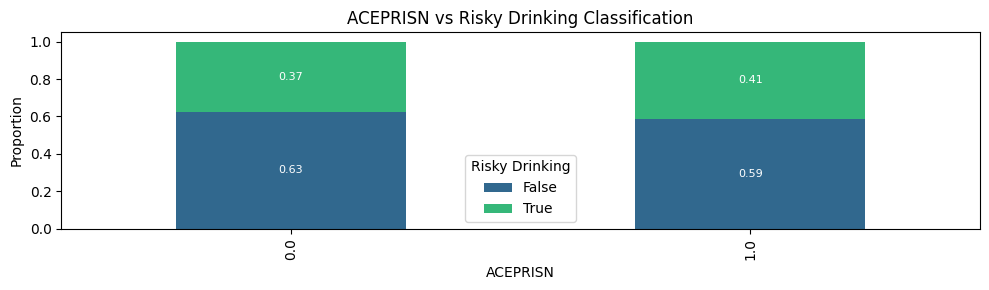

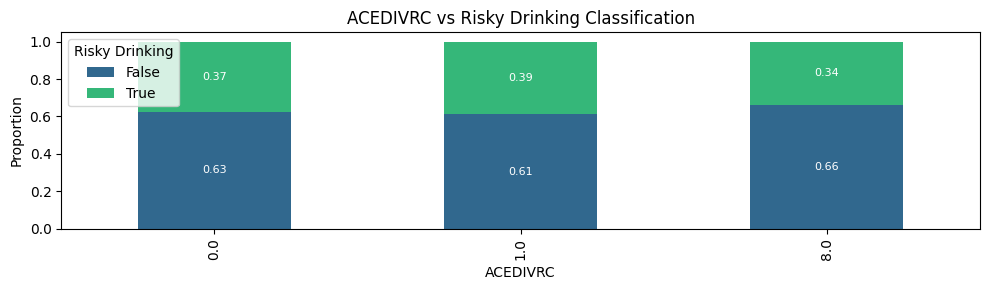

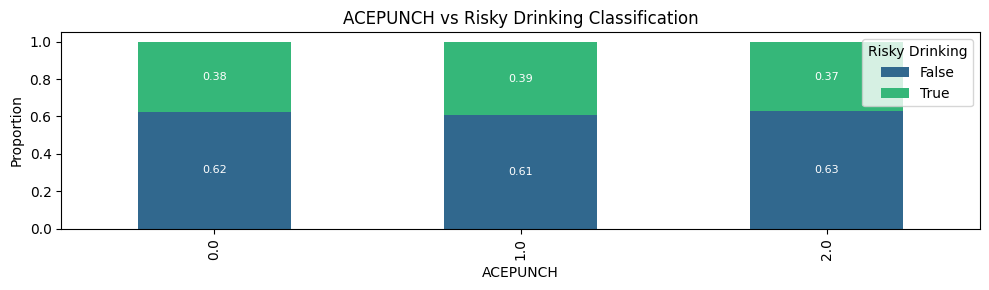

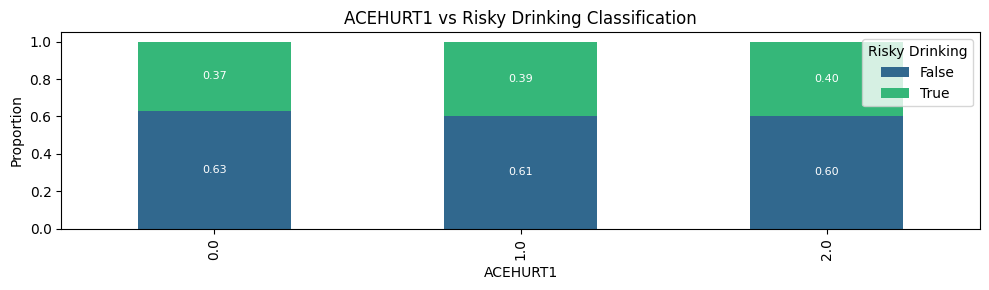

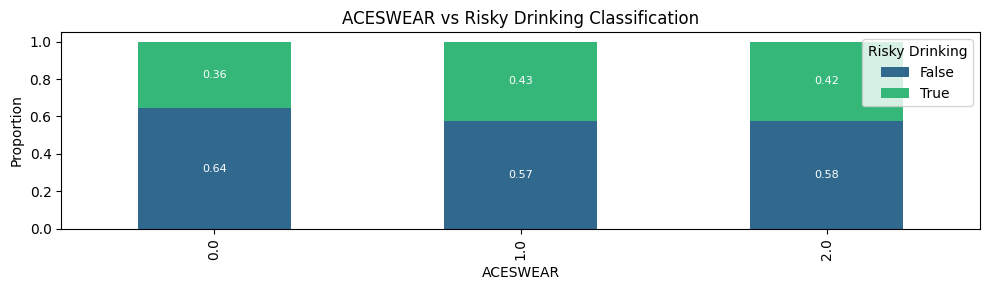

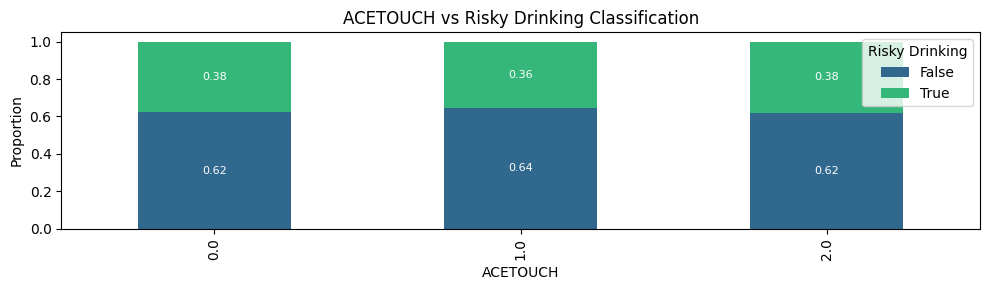

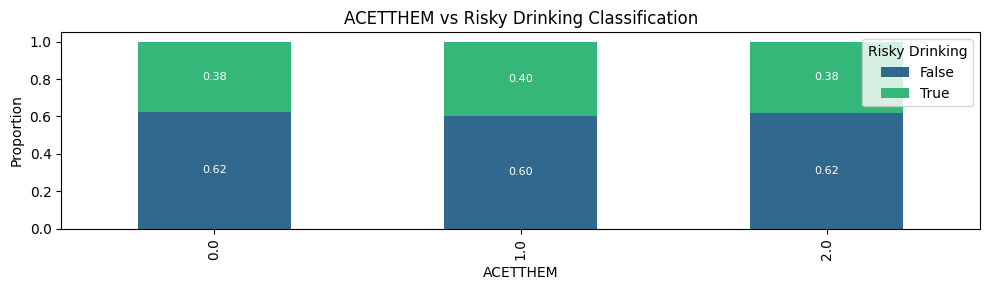

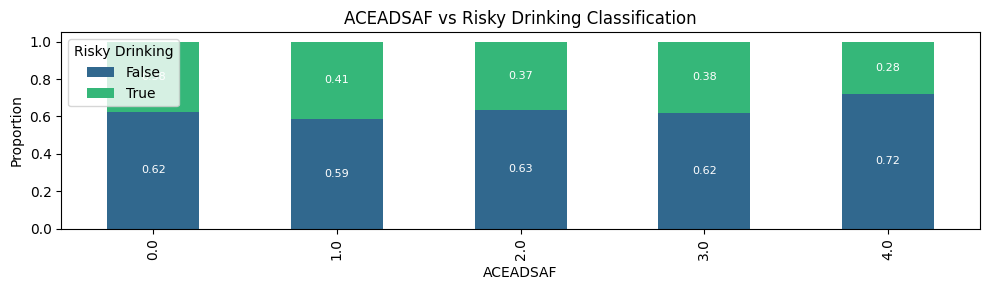

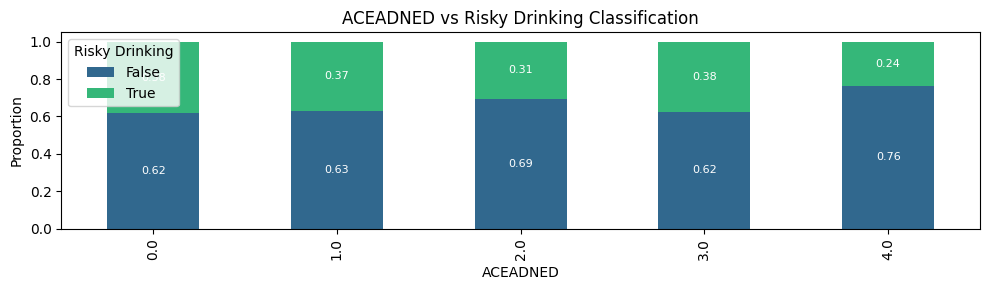

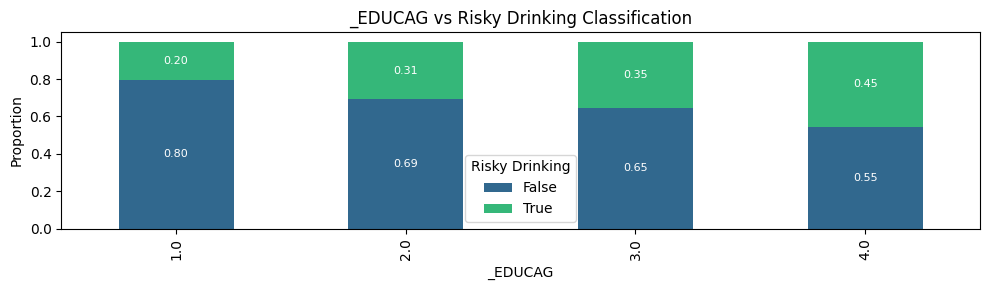

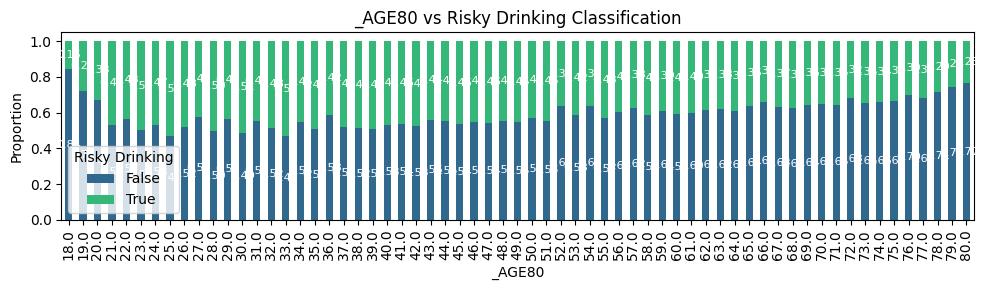

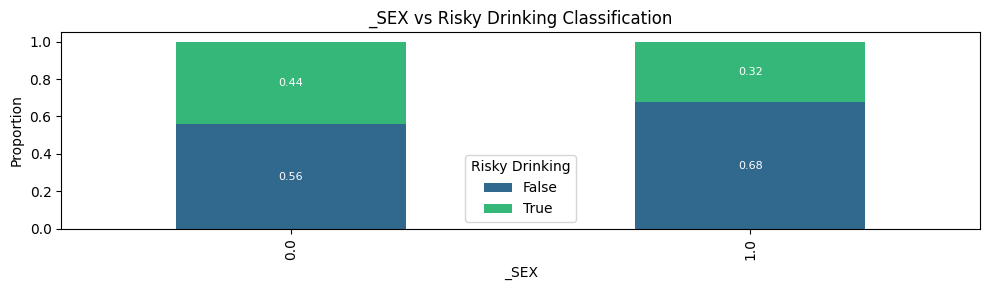

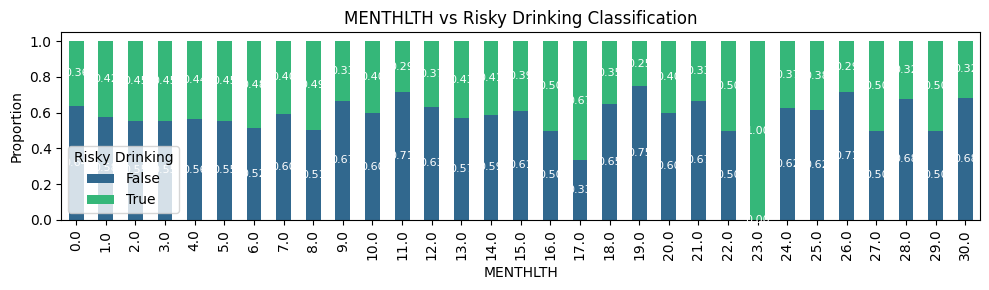

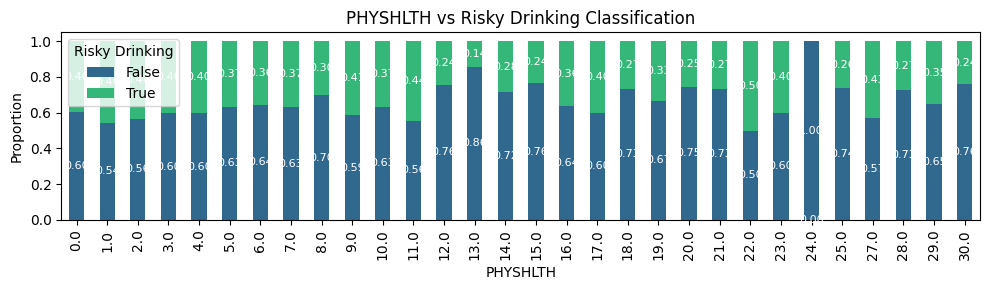

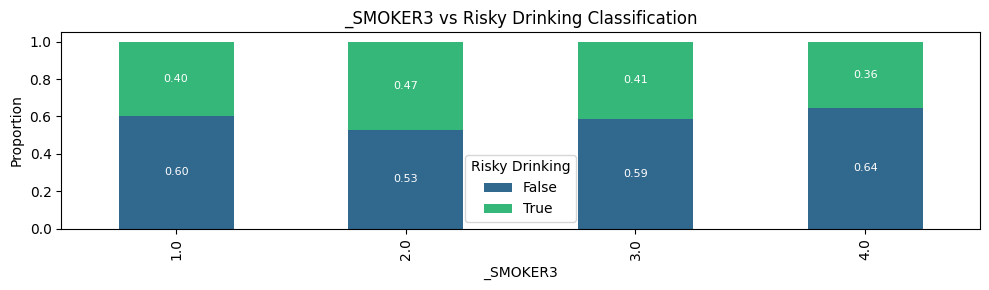

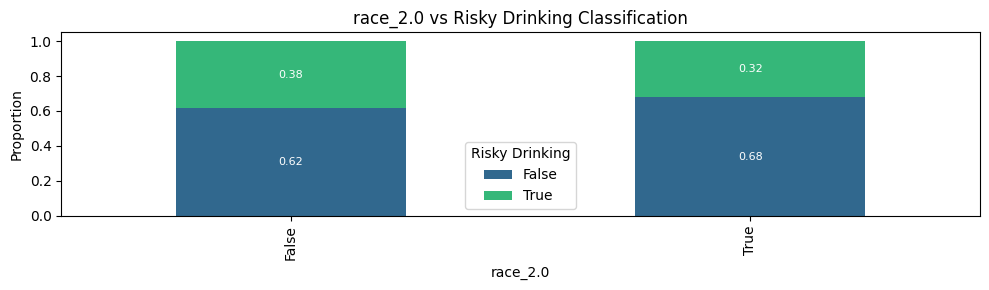

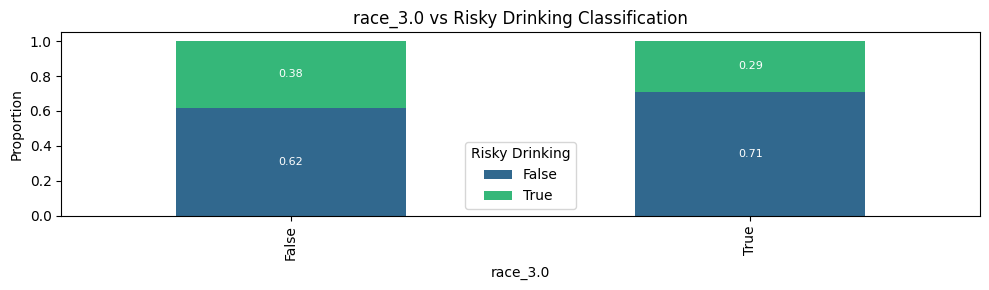

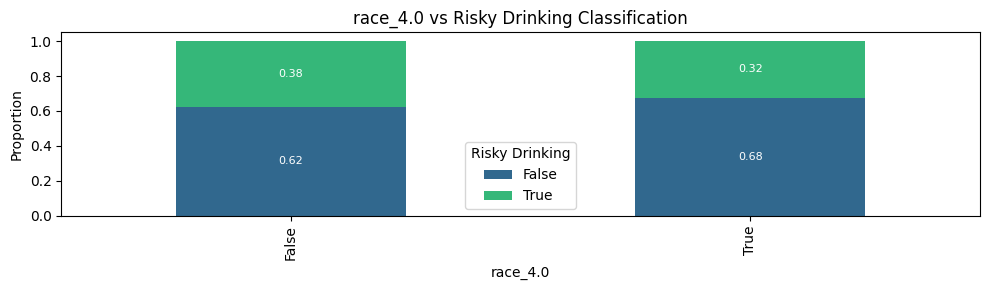

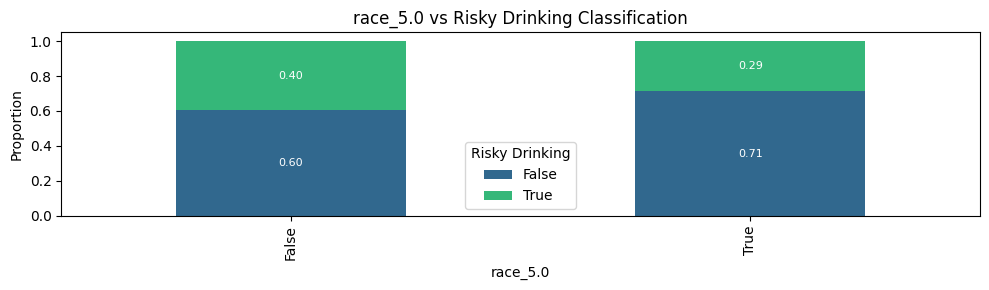

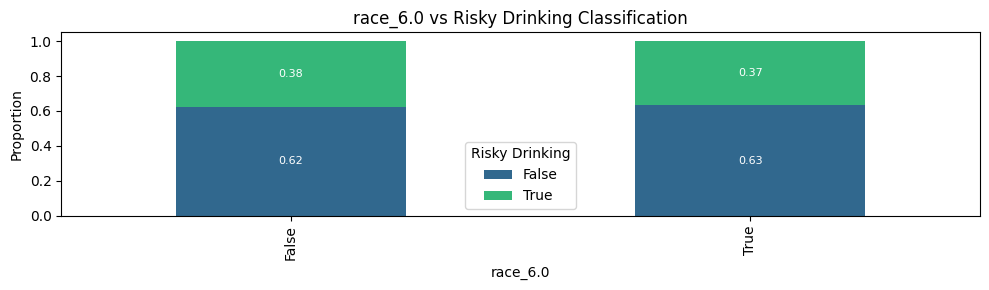

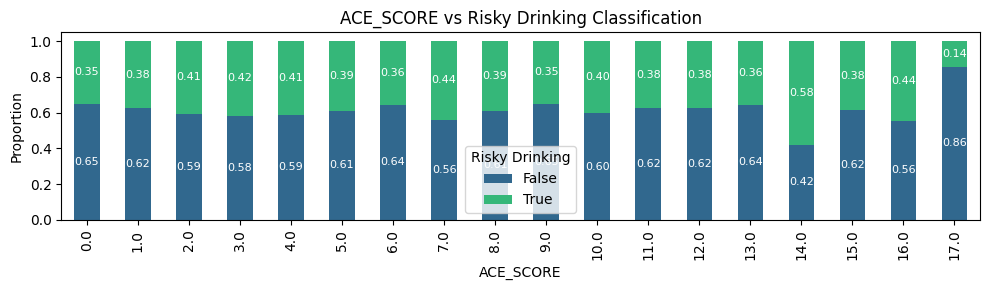

In [20]:
# For each of the X_train features, view the proportion of "risky drinking" classifications for each value
for col in X_train.columns:
    temp = pd.crosstab(X_train[col], Y_train['risky_drinking'], normalize='index')
    order = sorted(X_train[col].dropna().unique())
    temp = temp.reindex(order)
    colors = sns.color_palette("viridis", n_colors=len(temp.columns))
    ax = temp.plot(kind='bar', stacked=True, figsize=(10, 3), color=colors)
    # Add numeric labels to each bar segment
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f', label_type='center', fontsize=8, color='white')

    plt.title(f"{col} vs Risky Drinking Classification")
    plt.ylabel("Proportion")
    plt.xlabel(col)
    plt.legend(title="Risky Drinking")
    plt.tight_layout()
    plt.show()

### 3. Visualize the probabllity Y = risky drinking for each feature in X_train

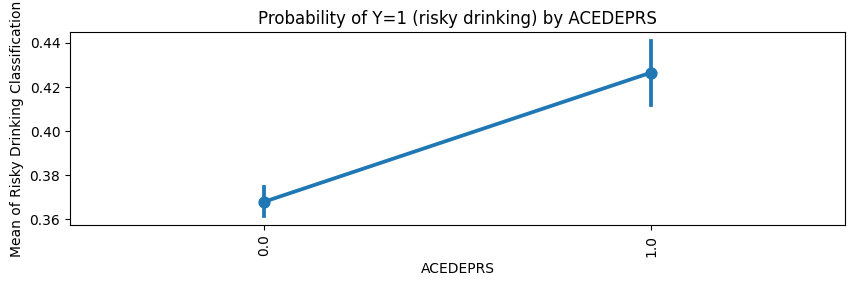

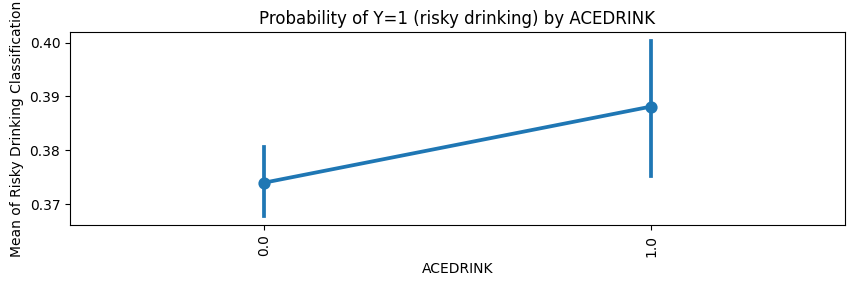

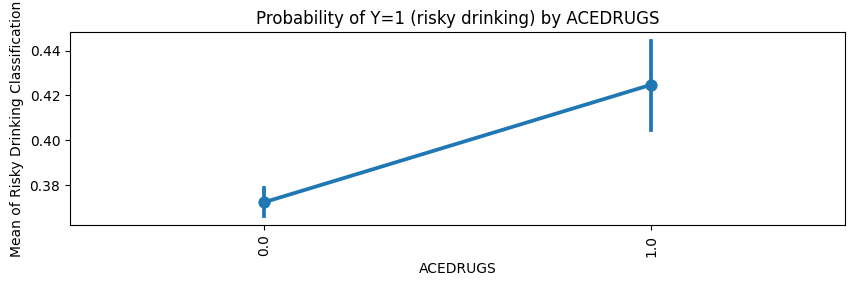

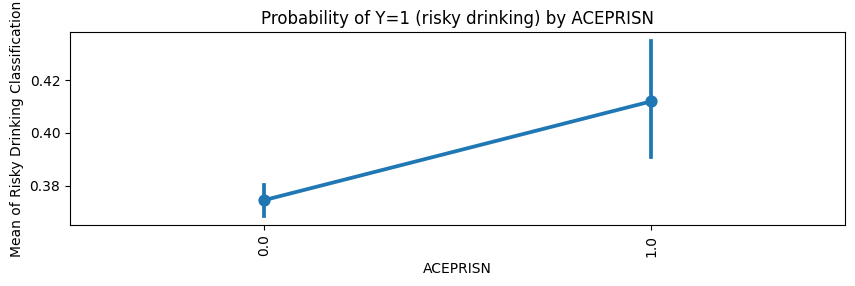

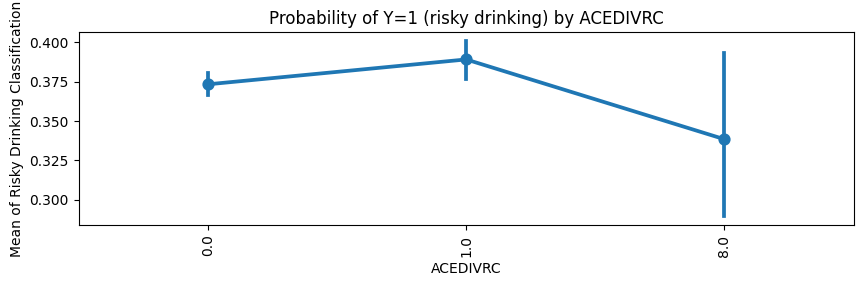

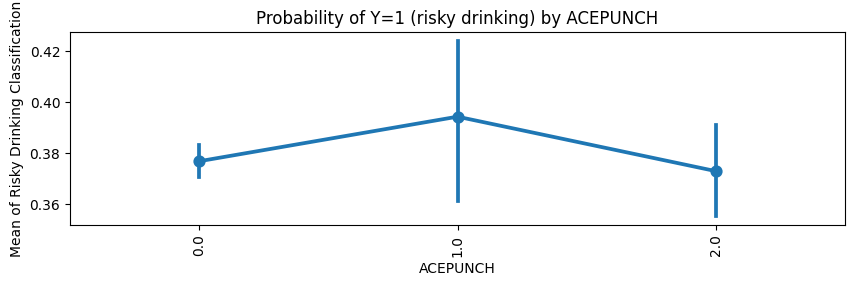

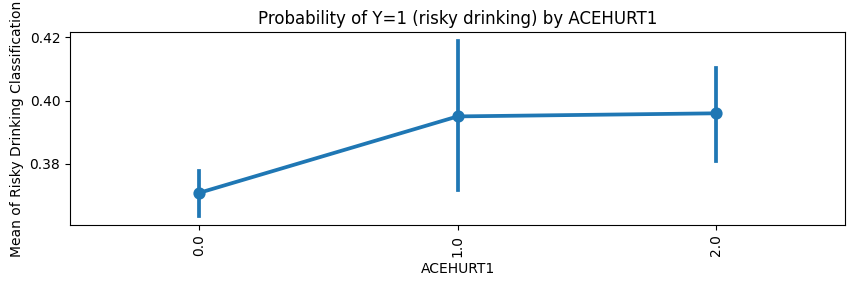

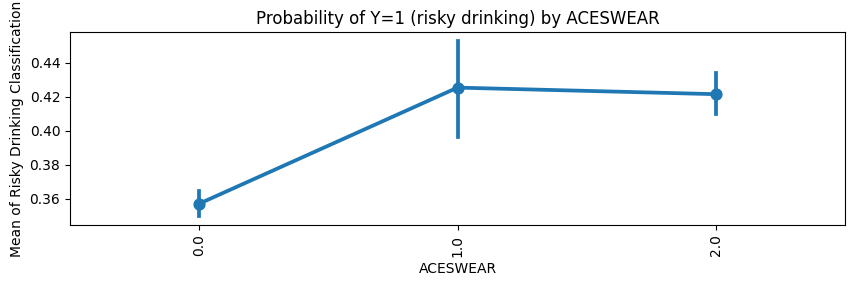

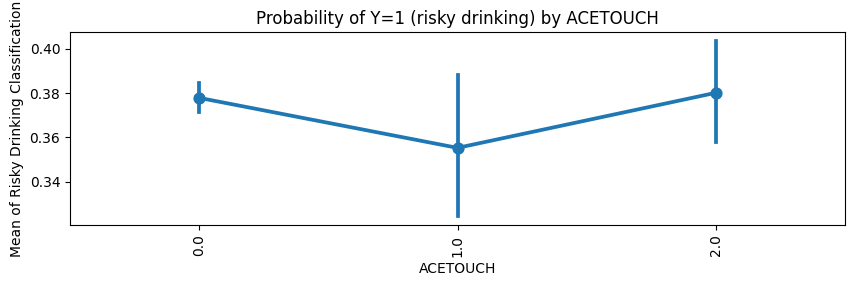

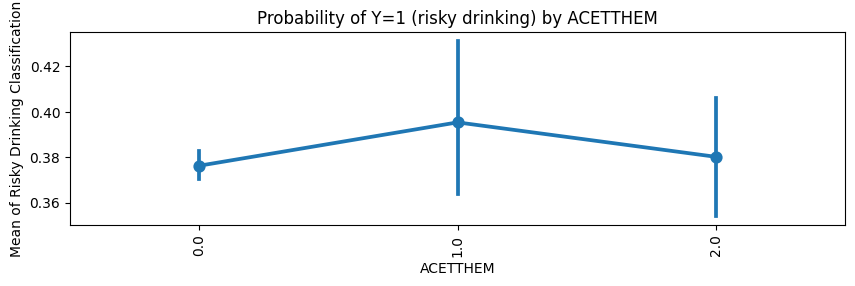

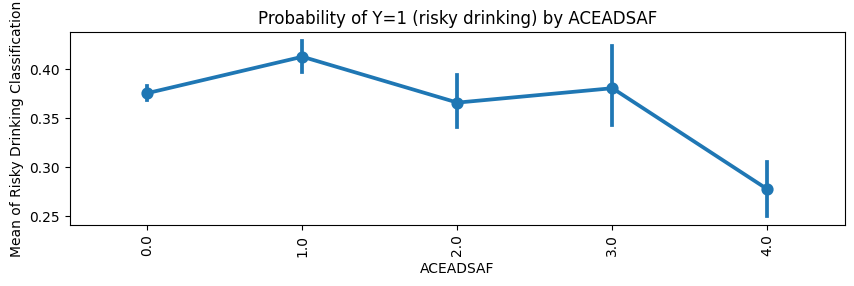

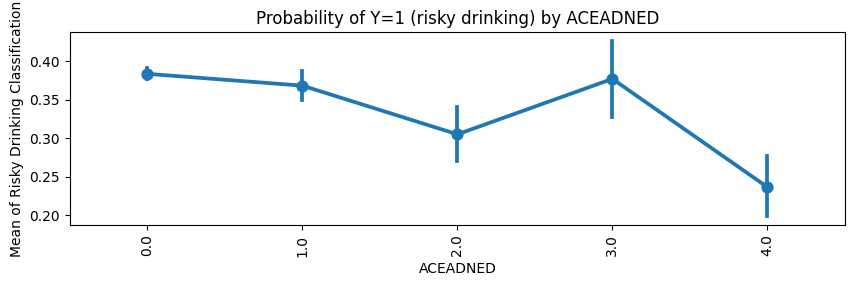

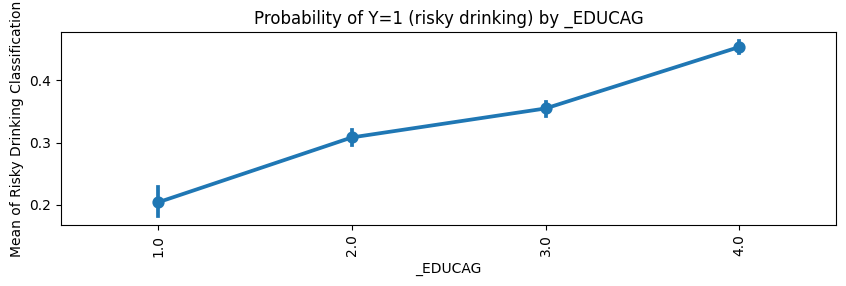

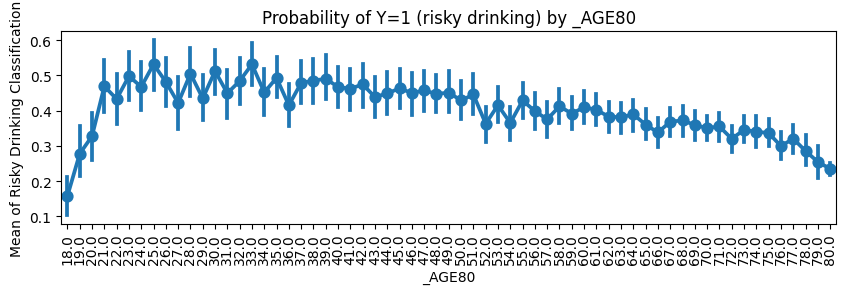

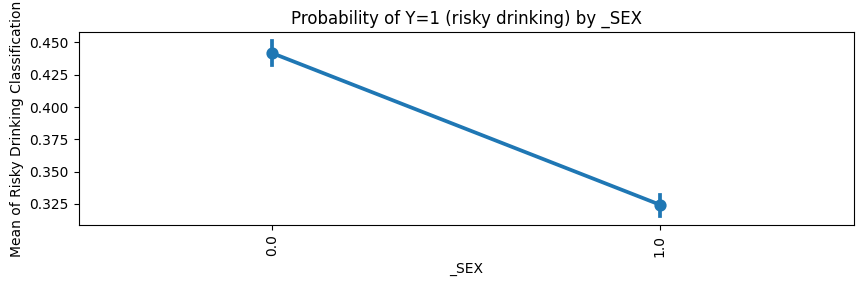

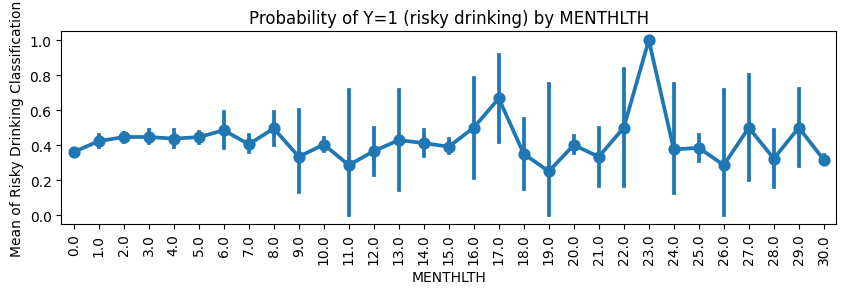

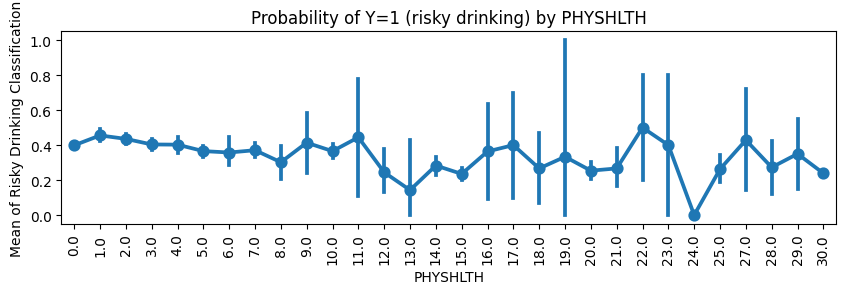

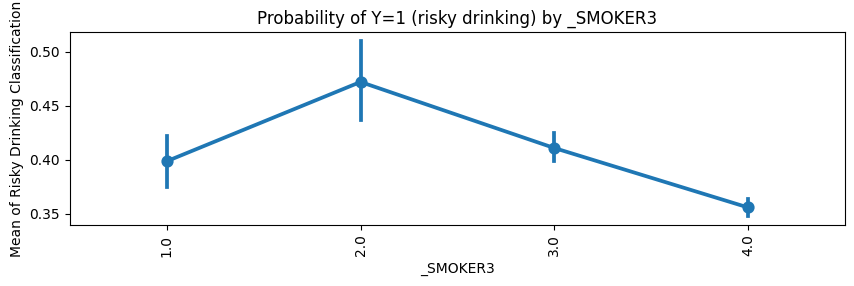

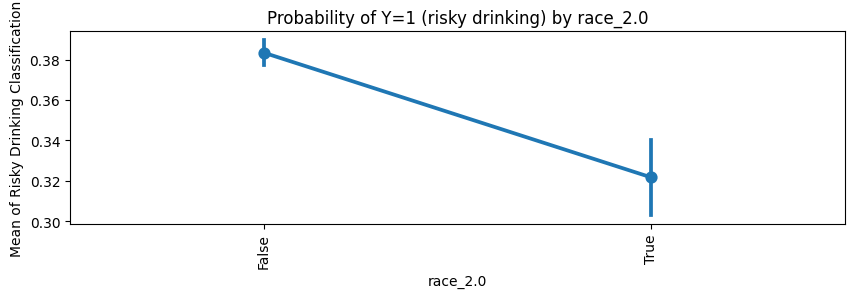

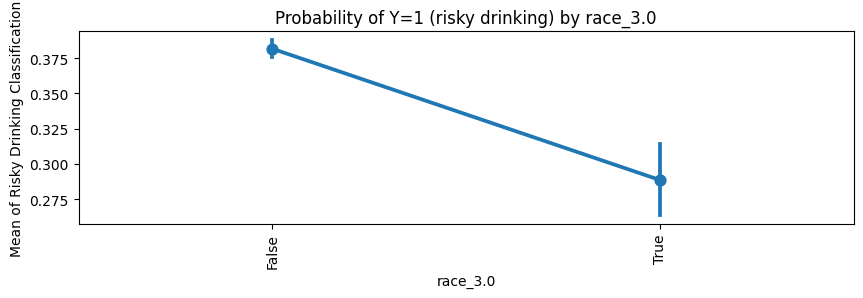

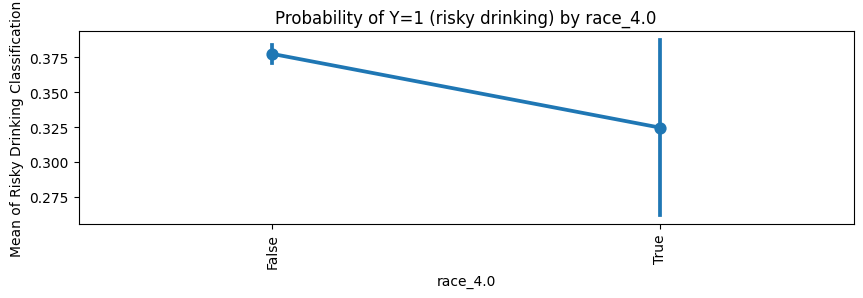

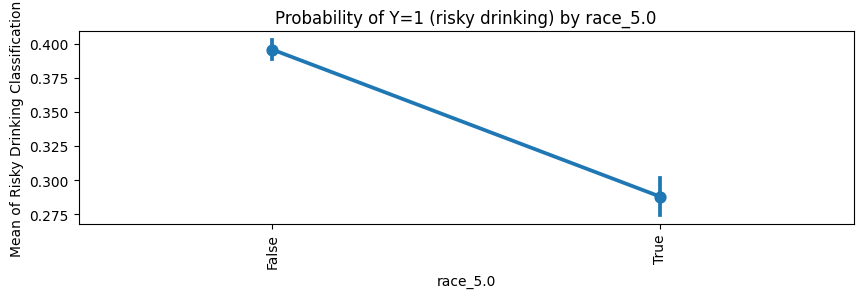

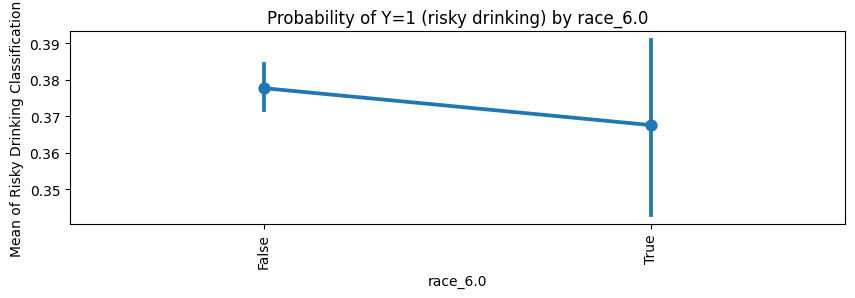

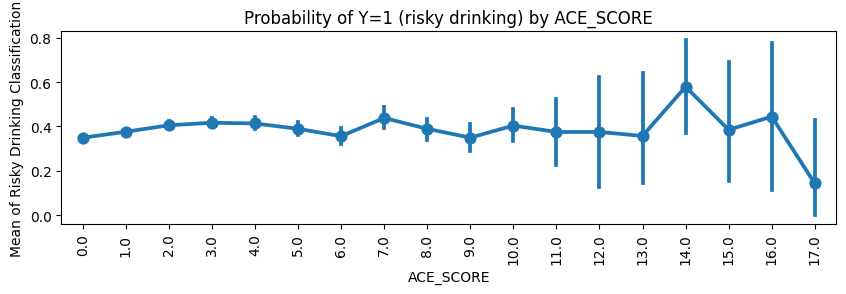

In [22]:
# Visualize the probabllity Y = risky drinking for each feature in X_train
for col in X_train.columns:
    plt.figure(figsize=(10, 2.5))
    order = sorted(X_train[col].dropna().unique())
    sns.pointplot(x=X_train[col], y=Y_train['risky_drinking'], order=order)
    plt.title(f"Probability of Y=1 (risky drinking) by {col}")
    plt.ylabel("Mean of Risky Drinking Classification")
    plt.xticks(rotation=90)
    plt.show()